In [2]:
# Importing packages...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns

In [3]:
# create data frame from our CSV file
real_data = pd.read_csv('Housing_Prices_24.csv')
# create numeric binary variable from the "Central Air" variable
real_data['HasCentralAir'] = real_data['CentralAir'].map({'Y': 1, 'N': 0})

In [4]:
print(real_data)
# create a numeric-only data subset. This will be primarily used for the correlation matrix!
real_data_num = real_data.drop(columns=['BldgType', 'LotConfig', 'Foundation', 'CentralAir','KitchenQual','PavedDrive','Id','HasCentralAir'])
# create a new variable that is the sum of the 1st and 2nd Flr square footage
real_data_num['Total_SF'] = real_data_num['1stFlrSF'] + real_data_num['2ndFlrSF'] + real_data_num['TotalBsmtSF']
# create a new variable that is the sum of the 1st and 2nd Flr square footage -- but for our original data set with dummy variables
real_data['Total_SF'] = real_data['1stFlrSF'] + real_data['2ndFlrSF'] + real_data['TotalBsmtSF']

        Id  SalePrice  LotArea  TotalBsmtSF  1stFlrSF  2ndFlrSF  FullBath  \
0        1     208500     8450          856       856       854         2   
1        2     181500     9600         1262      1262         0         2   
2        3     223500    11250          920       920       866         2   
3        4     140000     9550          756       961       756         1   
4        5     250000    14260         1145      1145      1053         2   
...    ...        ...      ...          ...       ...       ...       ...   
1455  1456     175000     7917          953       953       694         2   
1456  1457     210000    13175         1542      2073         0         2   
1457  1458     266500     9042         1152      1188      1152         2   
1458  1459     142125     9717         1078      1078         0         1   
1459  1460     147500     9937         1256      1256         0         1   

      HalfBath  BedroomAbvGr  TotRmsAbvGrd  ...  LotConfig  BldgType  \
0  

In [5]:
# check to see if there is any missing data in our observations
missing_value_counts = real_data_num.isna().sum()
print(missing_value_counts)

SalePrice        0
LotArea          0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
FullBath         0
HalfBath         0
BedroomAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
YearBuilt        0
YearRemodAdd     0
YrSold           0
Total_SF         0
dtype: int64


In [6]:
# print summary statistics
print(real_data_num.describe())

           SalePrice        LotArea  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count    1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean   180921.195890   10516.828082  1057.429452  1162.626712   346.992466   
std     79442.502883    9981.264932   438.705324   386.587738   436.528436   
min     34900.000000    1300.000000     0.000000   334.000000     0.000000   
25%    129975.000000    7553.500000   795.750000   882.000000     0.000000   
50%    163000.000000    9478.500000   991.500000  1087.000000     0.000000   
75%    214000.000000   11601.500000  1298.250000  1391.250000   728.000000   
max    755000.000000  215245.000000  6110.000000  4692.000000  2065.000000   

          FullBath     HalfBath  BedroomAbvGr  TotRmsAbvGrd   Fireplaces  ...  \
count  1460.000000  1460.000000   1460.000000   1460.000000  1460.000000  ...   
mean      1.565068     0.382877      2.866438      6.517808     0.613014  ...   
std       0.550916     0.502885      0.815778      1.6

In [7]:
# notice: large outlier for square footage, rooms above ground, sale price
real_data_num = real_data_num[real_data_num['SalePrice'] < 700000]
real_data_num = real_data_num[real_data_num['TotRmsAbvGrd'] < 13.5]
real_data_num = real_data_num[real_data_num['Total_SF'] < 7500]


# do the same for our original dataset
real_data = real_data[real_data['SalePrice'] < 700000]
real_data = real_data[real_data['TotRmsAbvGrd'] < 13.5]
real_data = real_data[real_data['Total_SF'] < 7500]
real_data_num.shape

(1455, 21)

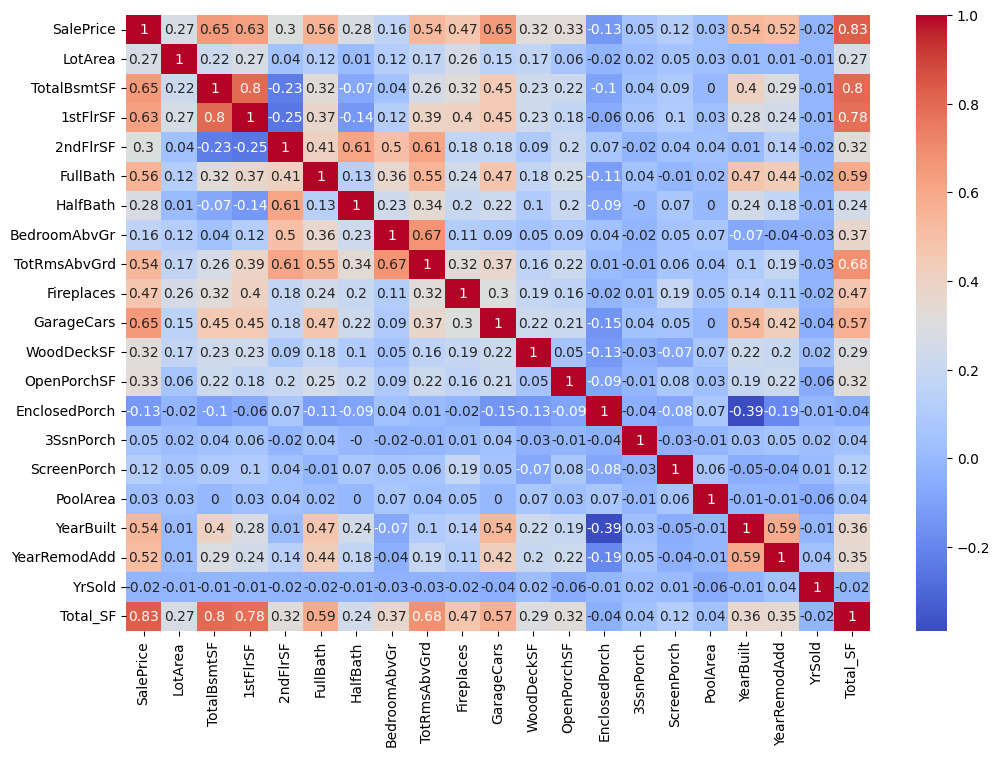

In [8]:
# Compute correlations using the numeric-only dataset
cormat = real_data_num.corr()

# Round correlation matrix to 2 decimal places
cormat = cormat.round(2)

# Create correlation matrix
plt.figure(figsize = (12,8))
sns.heatmap(cormat,annot=True, cmap = 'coolwarm',)
plt.show()

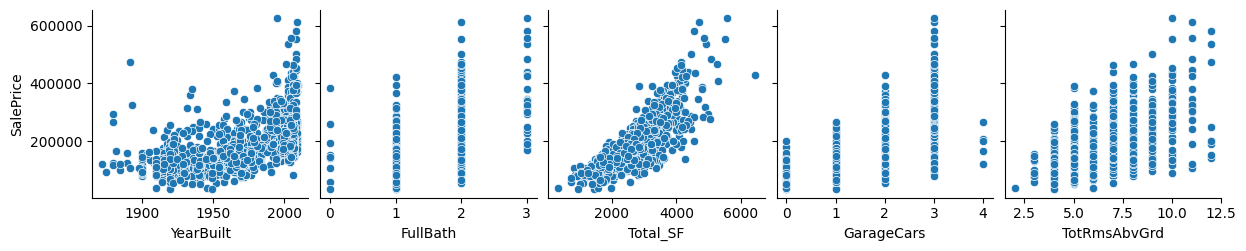

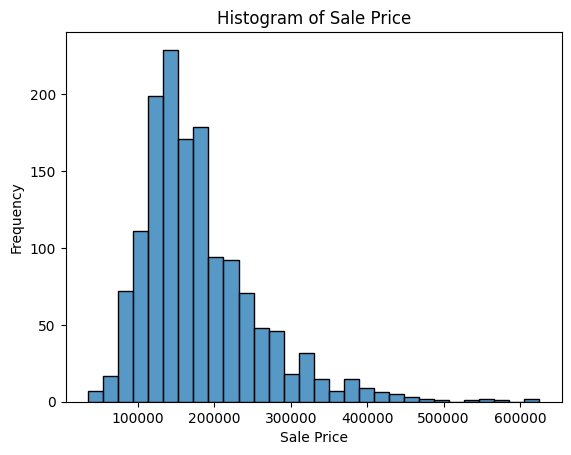

In [9]:
# plot graphs of x-y relationships
sns.pairplot(real_data_num,
             x_vars=['YearBuilt','FullBath','Total_SF','GarageCars','TotRmsAbvGrd'],
             y_vars="SalePrice")
plt.show()

sns.histplot(real_data_num['SalePrice'], bins=30)

# Adding labels and a title
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Histogram of Sale Price')

# Display the plot
plt.show()

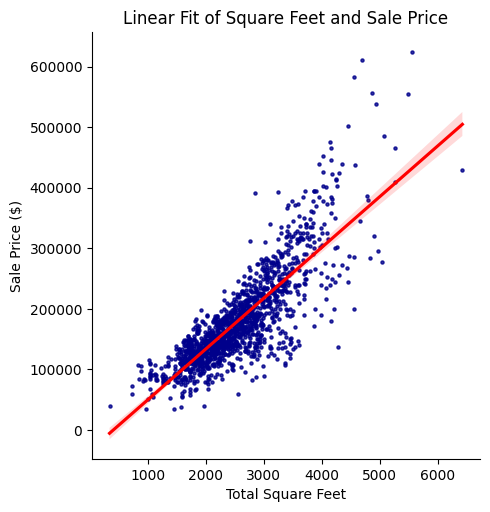

In [31]:
# Create the plot with a quadratic regression line and custom line color
sns.lmplot(x="Total_SF", y="SalePrice", data=real_data_num, 
           scatter_kws={'s': 5, 'color': 'darkblue'},  # Scatter point color
           line_kws={'color': 'red'},  # Line of best fit color
           order=1)

# Add labels and a title
plt.xlabel("Total Square Feet")
plt.ylabel("Sale Price ($)")
plt.title("Linear Fit of Square Feet and Sale Price")

# Show the plot
plt.show()

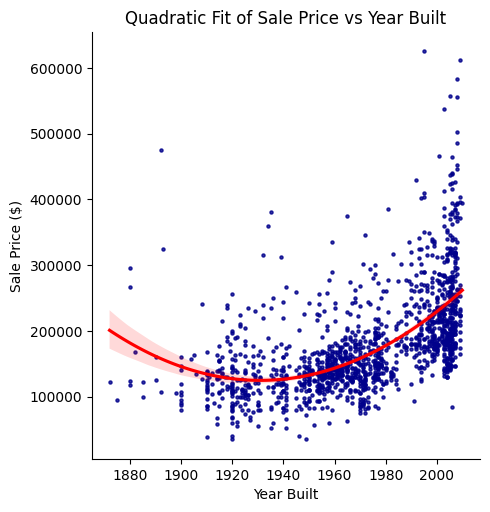

In [26]:
# Create the plot with a quadratic regression line and custom line color
sns.lmplot(x="YearBuilt", y="SalePrice", data=real_data_num, 
           scatter_kws={'s': 5, 'color': 'darkblue'},  # Scatter point color
           line_kws={'color': 'red'},  # Line of best fit color
           order=2)

# Add labels and a title
plt.xlabel("Year Built")
plt.ylabel("Sale Price ($)")
plt.title("Quadratic Fit of Sale Price vs Year Built")

# Show the plot
plt.show()

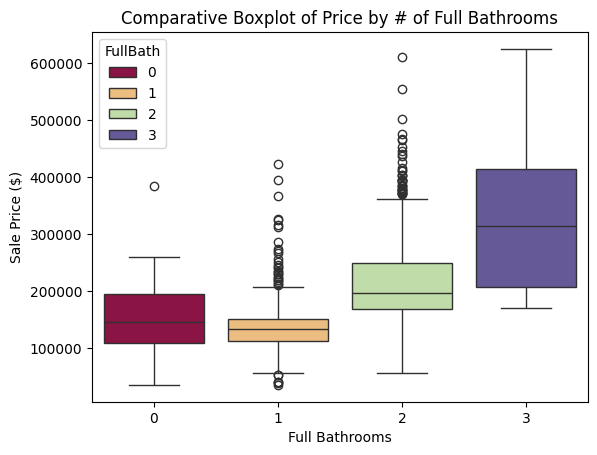

In [27]:
# Create the boxplot with the 'hue' parameter and disable the legend
sns.boxplot(x="FullBath", y="SalePrice", hue="FullBath", data=real_data, palette="Spectral", dodge=False)

# Add labels and a title
plt.xlabel("Full Bathrooms")
plt.ylabel("Sale Price ($)")
plt.title("Comparative Boxplot of Price by # of Full Bathrooms")

# Show the plot
plt.show()

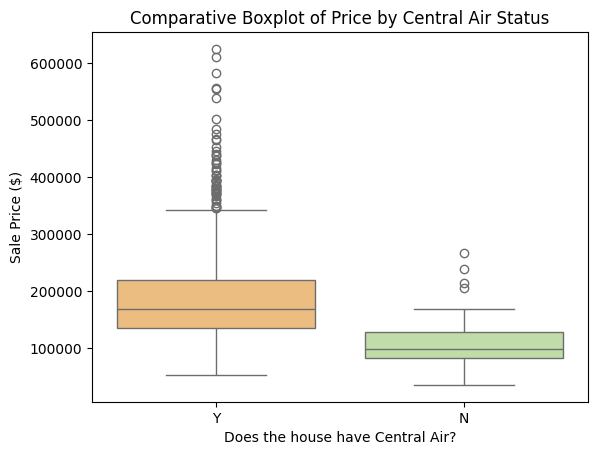

In [28]:
#Look at Central Air Possession vs Price
sns.boxplot(x="CentralAir", y="SalePrice",hue="CentralAir",palette="Spectral", dodge=False, data=real_data)

# Add labels and a title
plt.xlabel("Does the house have Central Air?")
plt.ylabel("Sale Price ($)")
plt.title("Comparative Boxplot of Price by Central Air Status")

# Show the plot
plt.show()

In [175]:
# Selecting columns from real_data_num using double brackets for a list of column names
X = real_data[['Total_SF','FullBath','HasCentralAir', "YearBuilt"]]

# taking the log of the total sqft variable
X['Total_SF'] = np.log(X['Total_SF'])

# other considered variable shifts, in code format (ended up omitting TotRmsAbvGrd, GarageCars) from my regression equation
# X['TotRmsAbvGrd_squared'] = X['TotRmsAbvGrd'] ** 2
# X['GarageCars_squared'] = X['GarageCars'] ** 2
X['YearBuilt_squared'] = X['YearBuilt'] ** 2
# X['FullBath_squared'] = X['FullBath'] ** 2
# X['TotRmsAbvGrd'] = np.log(X['TotRmsAbvGrd'])


# Taking the log of Price
y = np.log(real_data['SalePrice'])

# Adding a constant term to the independent variables (X)
X = sm.add_constant(X)

# Performing the linear regression
reg1 = sm.OLS(y, X).fit()

# Displaying the regression results
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     1017.
Date:                Fri, 13 Sep 2024   Prob (F-statistic):               0.00
Time:                        12:54:18   Log-Likelihood:                 378.74
No. Observations:                1455   AIC:                            -745.5
Df Residuals:                    1449   BIC:                            -713.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               146.4087     20.85

C:\Users\aaron\AppData\Local\Temp\ipykernel_4080\2067518647.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Total_SF'] = np.log(X['Total_SF'])
C:\Users\aaron\AppData\Local\Temp\ipykernel_4080\2067518647.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['YearBuilt_squared'] = X['YearBuilt'] ** 2


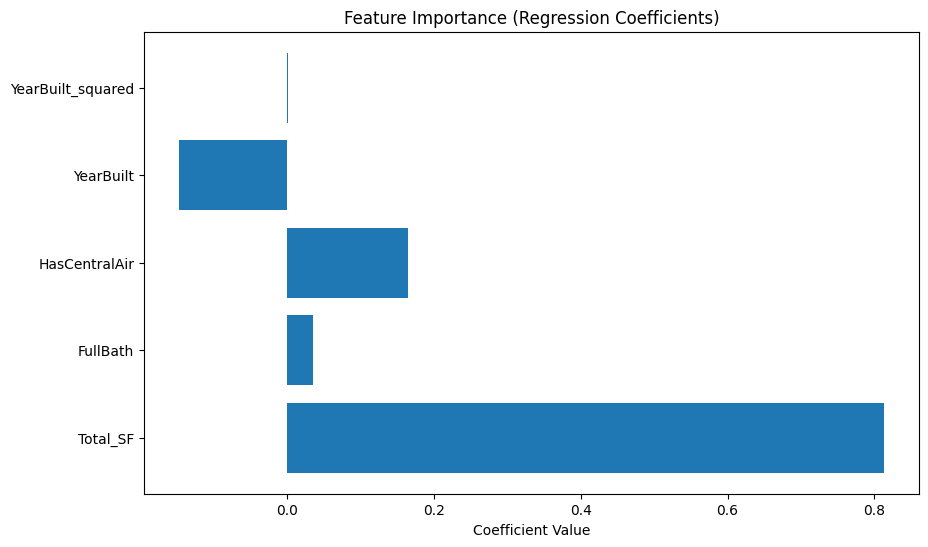

In [183]:
# Get the coefficients without the intercept
coefficients = reg1.params[1:]  # Exclude the constant term
variables = X.columns[1:]  # Exclude the constant term from the variable list

# Plot the coefficients as a bar chart
plt.figure(figsize=(10, 6))
plt.barh(variables, coefficients)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Regression Coefficients)')
plt.show()

In [178]:
# Calculate VIF scores to make sure there is no multicollinearity
vifres = pd.DataFrame()
vifres["Variable"] = X.columns
vifres["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifres)

            Variable           VIF
0              const  1.811476e+07
1           Total_SF  1.602926e+00
2           FullBath  1.839994e+00
3      HasCentralAir  1.261593e+00
4          YearBuilt  1.712967e+04
5  YearBuilt_squared  1.716686e+04


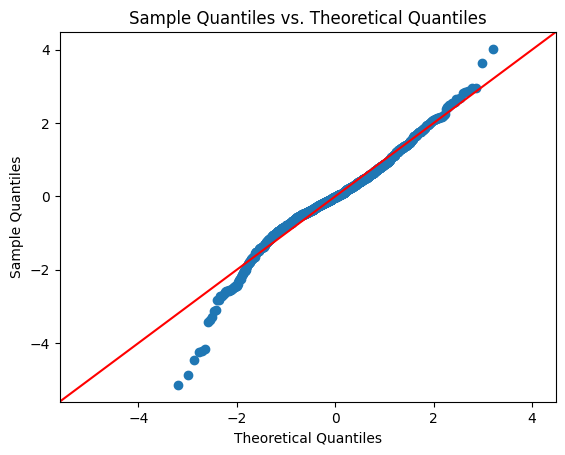

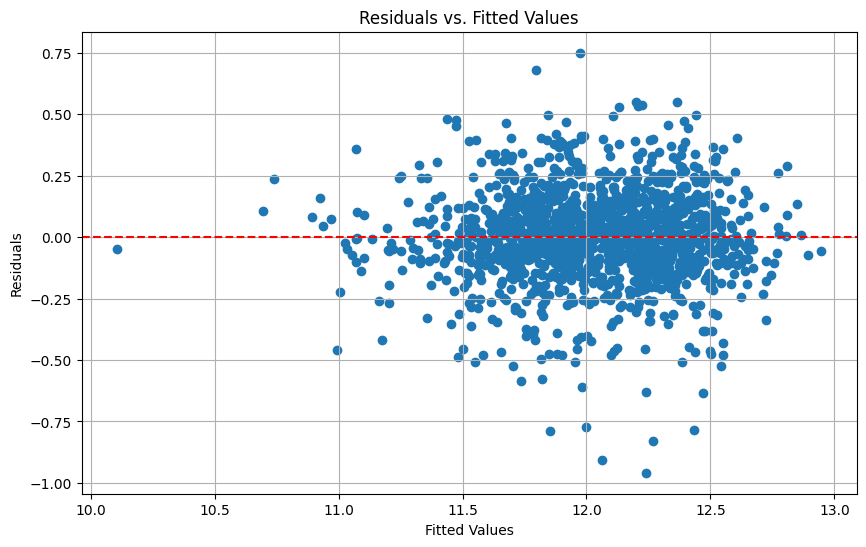

In [184]:
# Calculate residuals
residuals = reg1.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.title('Sample Quantiles vs. Theoretical Quantiles')
plt.show()


# Residuals vs. Fitted graph
plt.figure(figsize=(10, 6))
plt.scatter(reg1.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

In [214]:
# use 5 new houses to make predictions
new_data = pd.read_csv('homesforsale.csv')

# making data transformations to properly align with our regression model
new_data['Total_SF'] = new_data['1stFlrSF'] + new_data['2ndFlrSF'] + new_data['TotalBsmtSF']
new_data['Total_SF'] = np.log(new_data['Total_SF'])
new_data['YearBuilt_squared'] = new_data['YearBuilt'] ** 2
new_data['HasCentralAir'] = new_data['CentralAir'].map({'Y': 1, 'N': 0})
# add constant
new_data['const'] = 1

# Check the columns in new_data
print(new_data)


     Id  LotArea  TotalBsmtSF  1stFlrSF  2ndFlrSF  FullBath  HalfBath  \
0  11_1     8450            0       856       854         2         1   
1  11_2     9600         1262      1262         0         2         0   
2  11_3    11250          920       920       866         2         1   
3  11_4    11899         1175      1200      1142         3         1   
4  11_5    10791            0      1296         0         2         0   

   BedroomAbvGr  TotRmsAbvGrd  Fireplaces  ...  YearRemodAdd  Foundation  \
0             3             8           0  ...          2003       PConc   
1             3             6           1  ...          1976      CBlock   
2             3             6           1  ...          2002       PConc   
3             4            12           2  ...          2006       PConc   
4             2             6           0  ...          1967        Slab   

   CentralAir  KitchenQual  PavedDrive  YrSold  Total_SF YearBuilt_squared  \
0           Y           Fa

In [215]:
# Make predictions using the model
new_data = new_data[['const', 'Total_SF', 'FullBath', 'HasCentralAir', 'YearBuilt', 'YearBuilt_squared']]
predicted_log_sale_price = reg1.predict(new_data)

# Convert the predictions back from log scale to the original scale
predicted_sale_price = np.exp(predicted_log_sale_price)

# Display the predictions
print(predicted_sale_price)

0    148751.078921
1    173484.697589
2    213019.164648
3    280724.757457
4     96790.508772
dtype: float64
